# Implementation in Python of toxicity scoring function in Cello 2.0

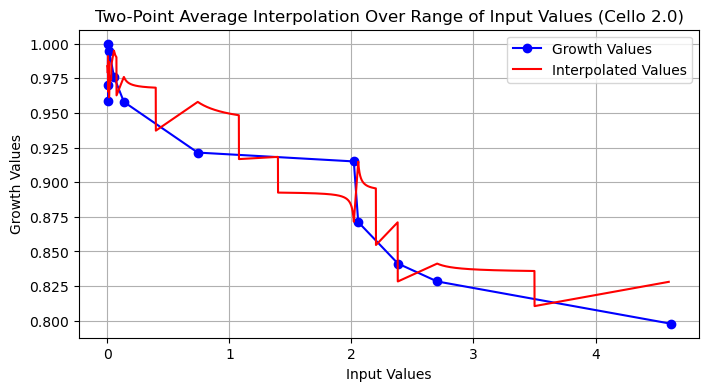

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

def two_point_average_interpolation(x, input_values, growth_values):
    argMinA = -1
    minA = float('inf')
    argMinB = -1
    minB  = float('inf')

    for row, record in enumerate(input_values):
        distance = euclidean([x], [record])
        if distance < minA:
            argMinB = argMinA;
            minB = minA;
            argMinA = row;
            minA = distance;
        elif distance < minB:
            argMinB = row;
            minB = distance;

    valueA = growth_values[argMinA]
    valueB = growth_values[argMinB]
    rtn = (valueA * minA + valueB * minB) / (minA + minB);
    
    return rtn

# Q1_QacR_toxicity
input_values = [
                0.00422,
                0.00497,
                0.009,
                0.0142,
                0.05441,
                0.13559,
                0.74062,
                2.0196,
                2.05552,
                2.38089,
                2.70194,
                4.61805
            ]

growth_values = [
                1.0,
                0.970017637,
                0.958449802,
                0.995058401,
                0.976074008,
                0.957996406,
                0.921387807,
                0.914994509,
                0.871202289,
                0.841232405,
                0.828316861,
                0.797777112
            ]

input_range = np.linspace(0, 4.6, 5000)
interpolated_values = [two_point_average_interpolation(x, input_values, growth_values) for x in input_range]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(input_values, growth_values, 'bo-', label='Growth Values')
plt.plot(input_range, interpolated_values, 'r-', label='Interpolated Values')

plt.title('Two-Point Average Interpolation Over Range of Input Values (Cello 2.0)')
plt.xlabel('Input Values')
plt.ylabel('Growth Values')
plt.legend()
plt.grid(True)
plt.show()

# Proposed correction to rtn

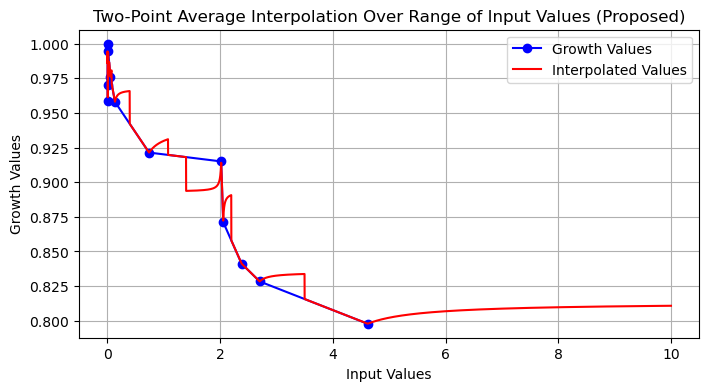

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

def two_point_average_interpolation_v2(x, input_values, growth_values):
    argMinA = -1
    minA = float('inf')
    argMinB = -1
    minB  = float('inf')

    for row, record in enumerate(input_values):
        distance = euclidean([x], [record])
        if distance < minA:
            argMinB = argMinA;
            minB = minA;
            argMinA = row;
            minA = distance;
        elif distance < minB:
            argMinB = row;
            minB = distance;

    valueA = growth_values[argMinA]
    valueB = growth_values[argMinB]
    rtn = (valueA * 1/minA + valueB * 1/minB) / (1/minA + 1/minB);
    
    return rtn

# Q1_QacR_toxicity
input_values = [
                0.00422,
                0.00497,
                0.009,
                0.0142,
                0.05441,
                0.13559,
                0.74062,
                2.0196,
                2.05552,
                2.38089,
                2.70194,
                4.61805
            ]

growth_values = [
                1.0,
                0.970017637,
                0.958449802,
                0.995058401,
                0.976074008,
                0.957996406,
                0.921387807,
                0.914994509,
                0.871202289,
                0.841232405,
                0.828316861,
                0.797777112
            ]


input_range = np.linspace(0, 10, 5000)
interpolated_values = [two_point_average_interpolation_v2(x, input_values, growth_values) for x in input_range]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(input_values, growth_values, 'bo-', label='Growth Values')
plt.plot(input_range, interpolated_values, 'r-', label='Interpolated Values')

plt.title('Two-Point Average Interpolation Over Range of Input Values (Proposed)')
plt.xlabel('Input Values')
plt.ylabel('Growth Values')
plt.legend()
plt.grid(True)
plt.show()

# Example of 2-point weighted average interpolation, power 1

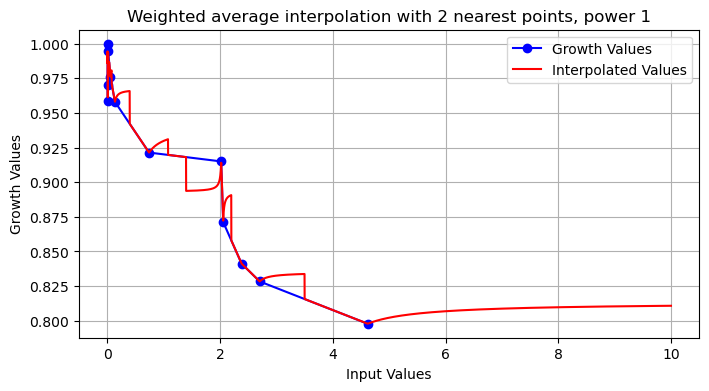

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

# Data
input_values = [
    0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.13559, 0.74062, 2.0196, 
    2.05552, 2.38089, 2.70194, 4.61805
]
growth_values = [
    1.0, 0.970017637, 0.958449802, 0.995058401, 0.976074008, 0.957996406, 
    0.921387807, 0.914994509, 0.871202289, 0.841232405, 0.828316861, 0.797777112
]

# Function to calculate inverse distance weight interpolation with k nearest points using euclidean distance
def inverse_distance_weighting(x, input_values, growth_values, k=2, p=1):
    distances = np.array([euclidean([x], [record]) for record in input_values])
    min_indices = np.argsort(distances)[:k]
    min_distances = distances[min_indices]
    min_growth_values = np.array(growth_values)[min_indices]
    
    if np.any(min_distances == 0):
        return min_growth_values[np.argmin(min_distances)]
    
    weights = 1 / min_distances**p
    weighted_average = np.sum(weights * min_growth_values) / np.sum(weights)
    return weighted_average

# Number of nearest points to use
k = 2

# Power parameter
p = 1

# Generate interpolated values over a range of input values
input_range = np.linspace(0, 10, 5000)
interpolated_values = [inverse_distance_weighting(x, input_values, growth_values, k, p) for x in input_range]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(input_values, growth_values, 'bo-', label='Growth Values')
plt.plot(input_range, interpolated_values, 'r-', label='Interpolated Values')

plt.title('Weighted average interpolation with 2 nearest points, power 1')
plt.xlabel('Input Values')
plt.ylabel('Growth Values')
plt.legend()
plt.grid(True)
plt.show()


# Example of 2-point weighted average interpolation, power 20

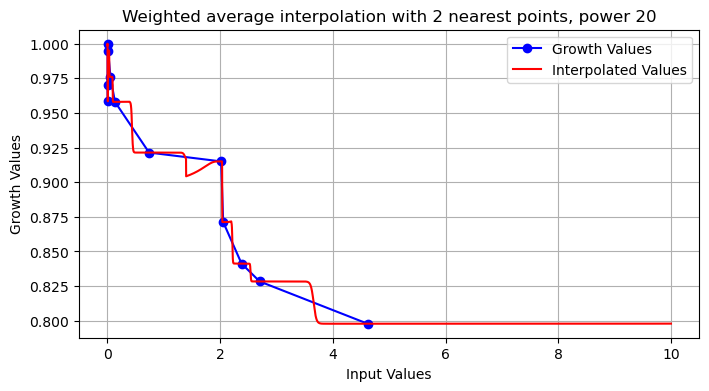

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

# Data
input_values = [
    0.00422, 0.00497, 0.009, 0.0142, 0.05441, 0.13559, 0.74062, 2.0196, 
    2.05552, 2.38089, 2.70194, 4.61805
]
growth_values = [
    1.0, 0.970017637, 0.958449802, 0.995058401, 0.976074008, 0.957996406, 
    0.921387807, 0.914994509, 0.871202289, 0.841232405, 0.828316861, 0.797777112
]

# Function to calculate inverse distance weight interpolation with k nearest points using euclidean distance
def inverse_distance_weighting(x, input_values, growth_values, k=2, p=1):
    distances = np.array([euclidean([x], [record]) for record in input_values])
    min_indices = np.argsort(distances)[:k]
    min_distances = distances[min_indices]
    min_growth_values = np.array(growth_values)[min_indices]
    
    if np.any(min_distances == 0):
        return min_growth_values[np.argmin(min_distances)]
    
    weights = 1 / min_distances**p
    weighted_average = np.sum(weights * min_growth_values) / np.sum(weights)
    return weighted_average

# Number of nearest points to use
k = 2

# Power parameter
p = 20

# Generate interpolated values over a range of input values
input_range = np.linspace(0, 10, 5000)
interpolated_values = [inverse_distance_weighting(x, input_values, growth_values, k, p) for x in input_range]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(input_values, growth_values, 'bo-', label='Growth Values')
plt.plot(input_range, interpolated_values, 'r-', label='Interpolated Values')

plt.title('Weighted average interpolation with 2 nearest points, power 20')
plt.xlabel('Input Values')
plt.ylabel('Growth Values')
plt.legend()
plt.grid(True)
plt.show()
